## Agenda:
1. ARIMA, SARIMAX
2. Autoregression, Moving Average, Integrated (to make ARIMA)
Autoregression is done by Partial Autocorrelation, Moving Average is done by Autocorrelation, and Moving Average is calculated by differencing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [2]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


## Auto Regression
We apply a regression algorithm to use the previous lags data to predict the current sales of the current month. 

The Partial Autocorrelation Function (PACF) helps us understand how much a time series is related to its past values, but it removes the influence of the values in between. For instance, if we want to see know how today's weather is related to the weather three days ago, PACF will tell us that, but it will ignore the weather from one and two days ago.

### Steps to Solve ARIMA or SARIMAX (Stationery Data) Problem:
1. Check the data for stationery (using Dickey Fuller Text, where the hypothesis is that the unit root is 1, implying that the data is not stationery. The alternate hypothesis, wherein the unit root < 1, implies that the data is stationery). The hypothesis is accepted or failed to be accepted depending on the p-value.
2. The difference between data at time t and time t-1 is calculated, post which the difference is put through the Dickey Fuller test.
3. The output of ARIMA = PACF + d + ACF

In [4]:
 df_airline.isnull().sum() #checking for null values

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
df_airline.tail() #since we have only 1 row, we will drop it

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
df_airline.dropna(axis = 0, inplace = True)

In [8]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [10]:
df_airline.info() #month should be of datetime type instead of object, so we will change it

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [11]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [12]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [13]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [14]:
#Set Month column as index
df_airline.set_index('Month', inplace = True)

In [15]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


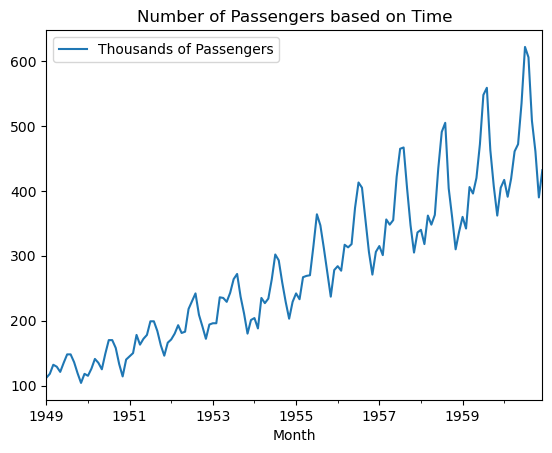

In [18]:
#Now, we will plot the dataset
df_airline.plot()
plt.title('Number of Passengers based on Time')
plt.show()

This data appears to be seasonal!

In [22]:
#We will now perform the Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, we reject the null hypothesis. Data has no unit root and is stationery.")
    else:
        print("Weak evidence against the null hypothesis. Data has a unit root and is non-stationery.")

In [23]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060371
p-value: 0.9918802434376408
Weak evidence against the null hypothesis. Data has a unit root and is non-stationery.


In [24]:
## Use differencing technqiues (I)
df_airline['Passengers First Differencing'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)

In [25]:
df_airline.head()

,Thousands of Passengers,Passengers First Differencing
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [26]:
#Put ADF test on First Differencing Column
adf_test(df_airline['Passengers First Differencing'].dropna())

ADF Statistics: -2.829266824169981
p-value: 0.05421329028382793
Weak evidence against the null hypothesis. Data has a unit root and is non-stationery.


In [27]:
#we want the data to be stationery, so we will try differencing again.
df_airline['Passengers Second Differencing'] = df_airline['Passengers First Differencing'] - df_airline['Passengers First Differencing'].shift(1)

In [28]:
df_airline.head()

,Thousands of Passengers,Passengers First Differencing,Passengers Second Differencing
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [29]:
#Put ADF test on second difference
adf_test(df_airline['Passengers Second Differencing'].dropna())

ADF Statistics: -16.384231542468505
p-value: 2.73289185001424e-29
Strong evidence against the null hypothesis, we reject the null hypothesis. Data has no unit root and is stationery.


This means, since we have 2 cases of differencing, our d = 2.

In [30]:
#Since our original data is seasonal, we will use the differencing for 12 months
df_airline['Passengers 12 Differencing'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [31]:
df_airline.head()

,Thousands of Passengers,Passengers First Differencing,Passengers Second Differencing,Passengers 12 Differencing
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [32]:
adf_test(df_airline['Passengers 12 Differencing'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514954
Strong evidence against the null hypothesis, we reject the null hypothesis. Data has no unit root and is stationery.


For seasonal data, ARIMA may not work well but SARIMAX will. As a result, we apply seasonal differencing to obtain stationery data.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
acf = plot_acf(df_airline['Passengers Second Differencing'].dropna())

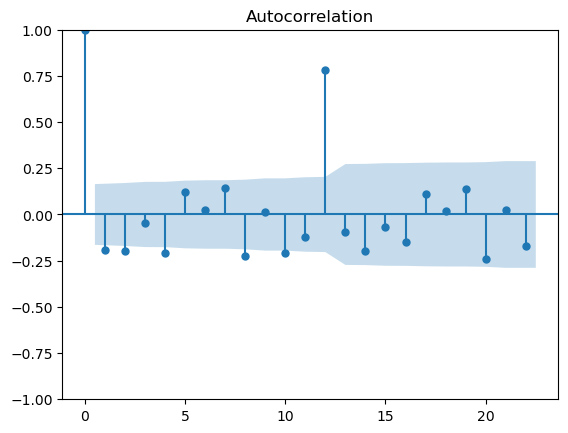

In [40]:
acf

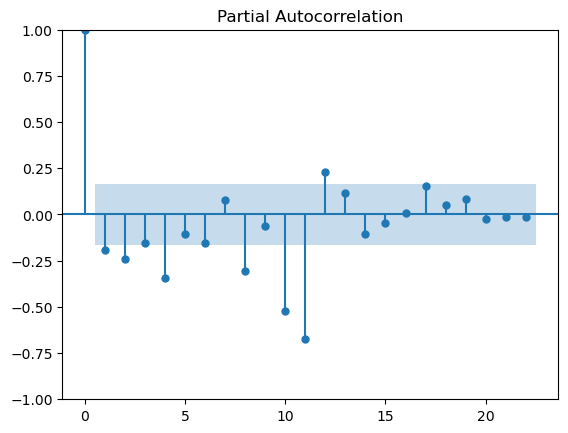

In [41]:
pacf = plot_pacf(df_airline['Passengers Second Differencing'].dropna())
pacf

With ACF, we calculate the parameter q.
In the ACF plot, we calculate with respect to the data points. In the ACF plot above, we see that q=12 until the data point again reaches out of the upper bound.

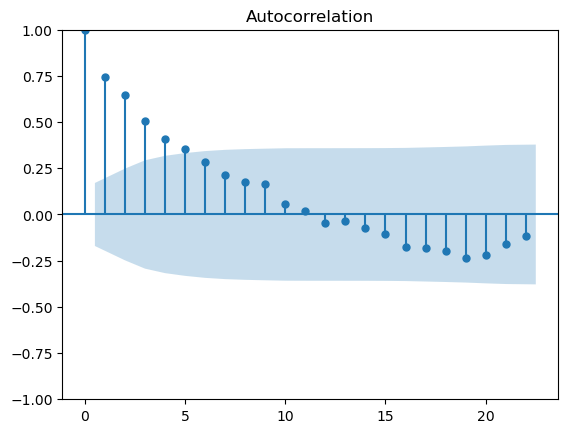

In [42]:
#Let's plot ACF plot for the seasonal data.
acf12 = plot_acf(df_airline['Passengers 12 Differencing'].dropna())
acf12

In the plot above, we see that there are 5 points out of the upper bound. As a result, q = 5. We do not count the first point as that is for value = 0.

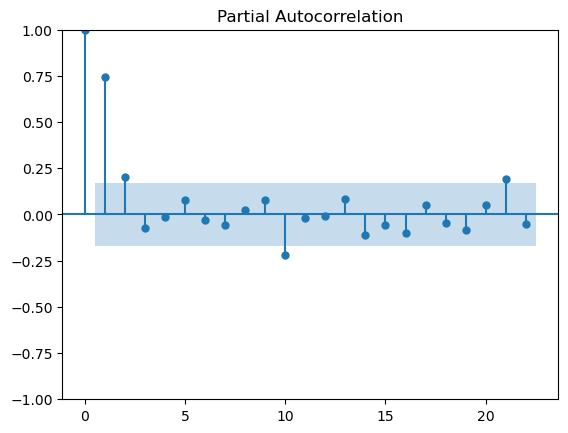

In [43]:
#Let's plot ACF plot for the seasonal data.
pacf12 = plot_pacf(df_airline['Passengers 12 Differencing'].dropna())
pacf12

From the above graph, we can consider two values of p, where p = 2 or p=10, based on where the data points are lying with respect to the upper and lower bounds. We will try with both the values of p and see which one works.

PACF is used to perform autoregression and helps calculate p.
ACF is used to calculate Moving Average and helps calculate q.
Differencing to make the time series data stationery is used to calculate d.
Ultimately, ARIMA = p + d + q.

In [50]:
##split train and test data
from datetime import datetime, timedelta
train_dataset = df_airline[:datetime(1955,12,1)]
test_dataset = df_airline[datetime(1955,12,1) + timedelta(days = 1): datetime(1960, 12, 1)]

In [51]:
test_dataset

,Thousands of Passengers,Passengers First Differencing,Passengers Second Differencing,Passengers 12 Differencing
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


## Create ARIMA Model

In [272]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA_model = ARIMA(train_dataset['Thousands of Passengers'], order = (10, 2, 12)) #Le/t's focus on autoregression. q = 12 will have to make us move this model to seasonal ARIMA. using second difference, not for seasonal data. p = 10, d = 2, q = 0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [273]:
ARIMA_fit = ARIMA_model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [274]:
ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.733
Date:                     Wed, 22 Jan 2025   AIC                            661.465
Time:                             14:11:40   BIC                            716.820
Sample:                         01-01-1949   HQIC                           683.689
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.487      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.639      0.523      -0.183       0.360
ar.L4         -1.0259      0.131     -7.831      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9861      0.143     -6.884      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.030      0.000      -1.222      -0.743
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.095      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.058      0.000      -1.784      -0.787
ma.L2          1.2392      0.358      3.457      0.001       0.537       1.942
ma.L3         -1.4413      0.436     -3.304      0.001      -2.296      -0.586
ma.L4          1.3757      0.507      2.716      0.007       0.383       2.369
ma.L5         -1.2160      0.574     -2.117      0.034      -2.342      -0.090
ma.L6          1.0827      0.660      1.641      0.101      -0.211       2.376
ma.L7         -1.0698      0.714     -1.497      0.134      -2.470       0.331
ma.L8          0.8857      0.819      1.082      0.279      -0.719       2.490
ma.L9         -0.7848      0.736     -1.066      0.287      -2.228       0.658
ma.L10         0.5230      0.601      0.870      0.384      -0.655       1.701
ma.L11        -0.4129      0.455     -0.908      0.364      -1.304       0.478
ma.L12         0.1334      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2234     16.206      4.765      0.000      45.461     108.986
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make Predictions Using Start and End Dates

In [275]:
prediction_start = test_dataset.index[0]
prediction_end = test_dataset.index[-1]
print(prediction_start)
print(prediction_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [276]:
predictions = ARIMA_fit.predict(start = prediction_start, end = prediction_end)

In [277]:
residuals = test_dataset['Thousands of Passengers'] - predictions

In [278]:
residuals

Month
1956-01-01      0.742818
1956-02-01      7.472376
1956-03-01     21.804990
1956-04-01     14.403325
1956-05-01     18.891731
1956-06-01     28.638264
1956-07-01     24.514481
1956-08-01     33.115761
1956-09-01     14.925417
1956-10-01      3.105715
1956-11-01     -0.799568
1956-12-01      3.374972
1957-01-01      3.909286
1957-02-01      7.182069
1957-03-01     39.026011
1957-04-01     23.470867
1957-05-01     28.885872
1957-06-01     49.291442
1957-07-01     50.443688
1957-08-01     70.454960
1957-09-01     38.725242
1957-10-01     14.784950
1957-11-01      2.502032
1957-12-01      6.552284
1958-01-01      1.446476
1958-02-01     -0.409054
1958-03-01     23.035996
1958-04-01     -2.535466
1958-05-01      9.753318
1958-06-01     35.418480
1958-07-01     50.508955
1958-08-01     83.713323
1958-09-01     13.356023
1958-10-01     -2.564177
1958-11-01    -23.152043
1958-12-01    -19.274901
1959-01-01     -5.699958
1959-02-01     -1.271892
1959-03-01     44.802902
1959-04-01     19.4

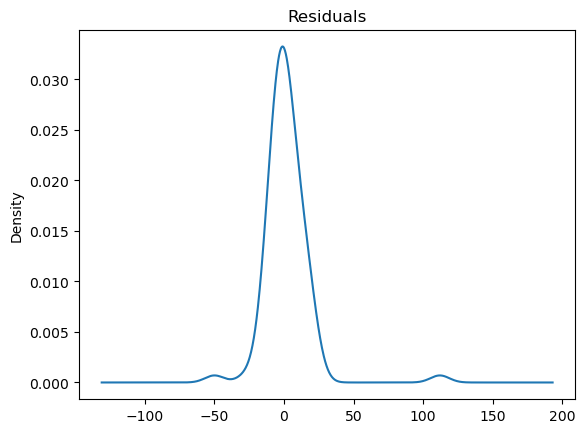

In [279]:
ARIMA_fit.resid.plot(kind = 'kde')
plt.title('Residuals')
plt.show()

In [280]:
#Put all predictions in a column
test_dataset['Predicted_ARIMA'] = predictions

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_6556/3900794021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Predicted_ARIMA'] = predictions


In [281]:
test_dataset

,Thousands of Passengers,Passengers First Differencing,Passengers Second Differencing,Passengers 12 Differencing,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,283.257182
1956-02-01,277.0,-7.0,-13.0,44.0,269.527624
1956-03-01,317.0,40.0,47.0,50.0,295.195010
1956-04-01,313.0,-4.0,-44.0,44.0,298.596675
1956-05-01,318.0,5.0,9.0,48.0,299.108269
1956-06-01,374.0,56.0,51.0,59.0,345.361736
1956-07-01,413.0,39.0,-17.0,49.0,388.485519
1956-08-01,405.0,-8.0,-47.0,58.0,371.884239
1956-09-01,355.0,-50.0,-42.0,43.0,340.074583


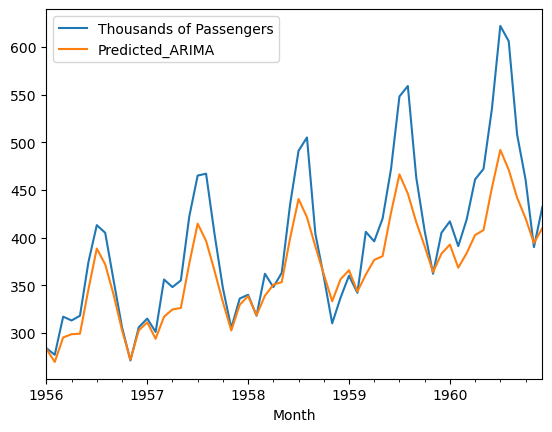

In [282]:
test_dataset[['Thousands of Passengers','Predicted_ARIMA']].plot()
plt.show()

### Create SARIMAX Model

In [283]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [285]:
model_SARIMA=SARIMAX(train_dataset['Thousands of Passengers'],order=(2,0,5),seasonal_order=(0,1,0,12))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [286]:
SARIMA_fit = model_SARIMA.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18183D+00    |proj g|=  3.68354D-02

At iterate    5    f=  3.17618D+00    |proj g|=  1.91560D-02

At iterate   10    f=  3.17380D+00    |proj g|=  3.11289D-03

At iterate   15    f=  3.17305D+00    |proj g|=  1.42213D-03

At iterate   20    f=  3.17300D+00    |proj g|=  2.86054D-03

At iterate   25    f=  3.17222D+00    |proj g|=  1.11456D-02

At iterate   30    f=  3.17064D+00    |proj g|=  9.59285D-03

At iterate   35    f=  3.17045D+00    |proj g|=  2.19110D-04

At iterate   40    f=  3.17045D+00    |proj g|=  5.87419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


In [288]:
SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(2, 0, 5)x(0, 1, [], 12)   Log Likelihood                -266.318
Date:                             Wed, 22 Jan 2025   AIC                            548.636
Time:                                     14:15:24   BIC                            566.850
Sample:                                 01-01-1949   HQIC                           555.887
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3147      1.446      0.909      0.363      -1.520       4.149
ar.L2         -0.3310      1.423     -0.233      0.816      -3.120       2.458
ma.L1         -0.5813      1.435     -0.405      0.685      -3.393       2.231
ma.L2          0.1519      0.425      0.358      0.721      -0.680       0.984
ma.L3         -0.2933      0.221     -1.325      0.185      -0.727       0.141
ma.L4          0.1245      0.411      0.303      0.762      -0.681       0.930
ma.L5          0.0729      0.174      0.420      0.675      -0.268       0.413
sigma2        92.0982     17.257      5.337      0.000      58.275     125.922
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               2.13   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [289]:
test_dataset.tail()

,Thousands of Passengers,Passengers First Differencing,Passengers Second Differencing,Passengers 12 Differencing,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,471.139267
1960-09-01,508.0,-98.0,-82.0,45.0,441.812214
1960-10-01,461.0,-47.0,51.0,54.0,420.273628
1960-11-01,390.0,-71.0,-24.0,28.0,394.296433
1960-12-01,432.0,42.0,113.0,27.0,409.909225


In [291]:
##prediction
pred_start_date = test_dataset.index[0]
pred_end_date = test_dataset.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [293]:
SARIMA_predictions = SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_dataset['Thousands of Passengers'] - SARIMA_predictions

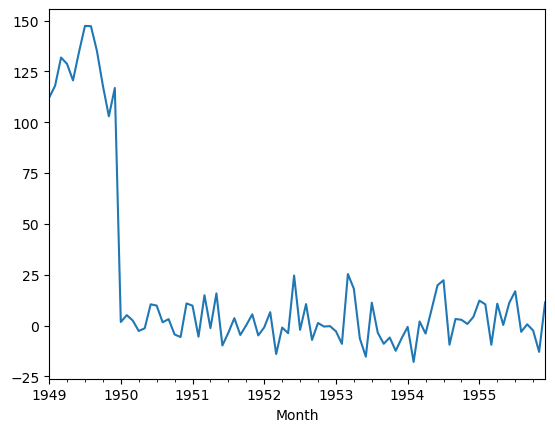

In [296]:
SARIMA_fit.resid.plot()
plt.show()

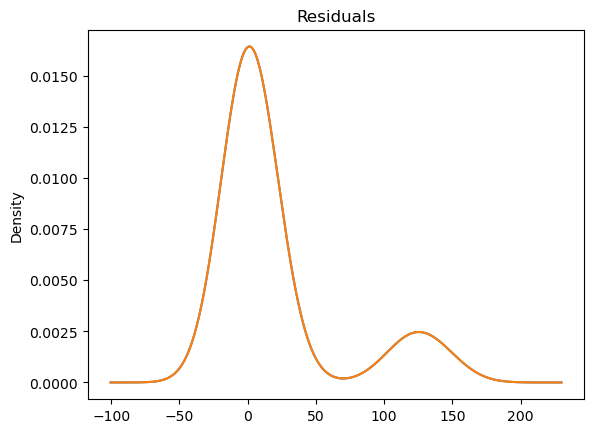

In [299]:
SARIMA_fit.resid.plot(kind='kde')
plt.title('Residuals')
plt.show()

In [301]:
test_dataset['Predicted_SARIMA'] = SARIMA_predictions

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_6556/222875062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Predicted_SARIMA'] = SARIMA_predictions


In [302]:
test_dataset

,Thousands of Passengers,Passengers First Differencing,Passengers Second Differencing,Passengers 12 Differencing,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,283.257182,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,269.527624,NaN
1956-03-01,317.0,40.0,47.0,50.0,295.195010,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,298.596675,NaN
1956-05-01,318.0,5.0,9.0,48.0,299.108269,NaN
1956-06-01,374.0,56.0,51.0,59.0,345.361736,NaN
1956-07-01,413.0,39.0,-17.0,49.0,388.485519,403.527090
1956-08-01,405.0,-8.0,-47.0,58.0,371.884239,385.575029
1956-09-01,355.0,-50.0,-42.0,43.0,340.074583,349.631718


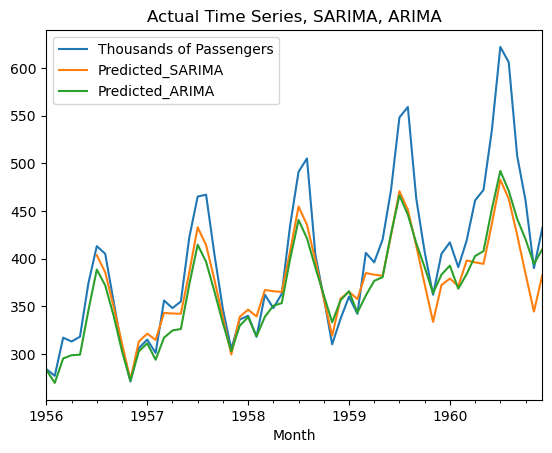

In [306]:
test_dataset[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
plt.title('Actual Time Series, SARIMA, ARIMA')
plt.show()